Task 2 - Sales Prediction on Advertising Dataset 
Domain - Data Science 
Batch - April Batch A46

In [1]:
#importing all the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#Loading the Dataset 
dt = pd.read_csv("advertising.csv")

Data Preprocessing

In [4]:
#Retriving the first 5 rows from the dataset 
dt.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
# used to analyze the numerical values and display the count,mean,min_value,max_value and many more
dt.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


MAX sale is 27 and MIN sale is 1.6
There are 200 observations for each variable
Average Value is high for TV 
Avergae Value is least for Radio

In [10]:
# Identifying the total Number of Rows and Columns present
rows,cols = dt.shape

In [11]:
rows

200

In [12]:
cols

4

In [13]:
#used to provide us with summary of data like index , count , memory usage , columns , non null values present.
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
#Idenntifying if there are NULL values present in the dataset or not 
dt.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [40]:
# Remove duplicates based on all columns
dt.drop_duplicates(inplace=True)

In [41]:
# removing the duplicate values so that the predicted model gives better accuracy results
dt.drop_duplicates

<bound method DataFrame.drop_duplicates of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [23]:
# Detect outliers using Z-score
from scipy import stats
z_scores = stats.zscore(dt)
# Find outliers
outliers = (np.abs(z_scores) > 3).any(axis=1)
outliers_dt = dt[outliers]

In [24]:
outliers_dt

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


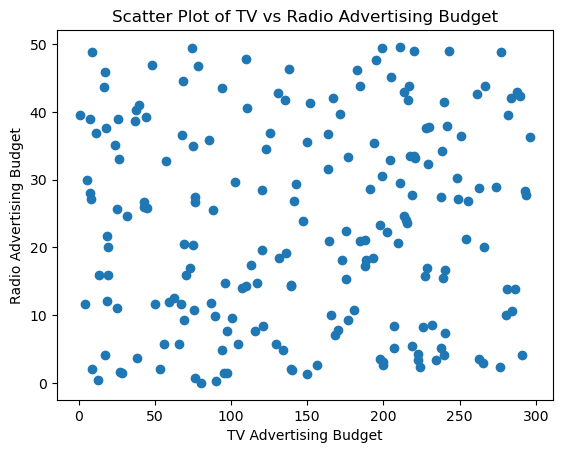

In [26]:
#Visualizing the dataset using a Scatter Plot
plt.scatter(dt['TV'], dt['Radio'])
plt.xlabel('TV Advertising Budget')
plt.ylabel('Radio Advertising Budget')
plt.title('Scatter Plot of TV vs Radio Advertising Budget')
plt.show()

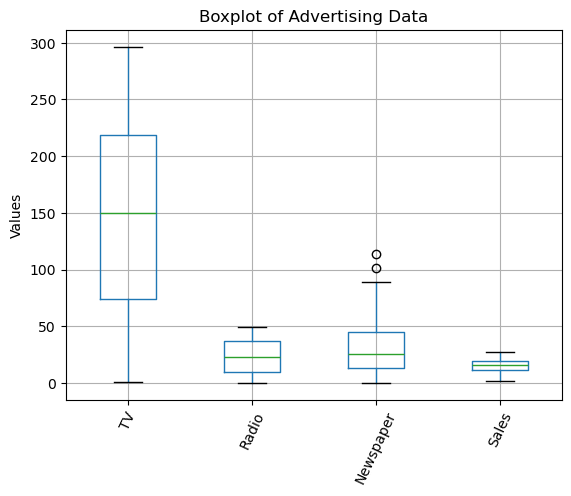

In [28]:
# Visualization Using a Box Plot
dt.boxplot()
plt.title('Boxplot of Advertising Data')
plt.ylabel('Values')
plt.xticks(rotation=)  
plt.show()

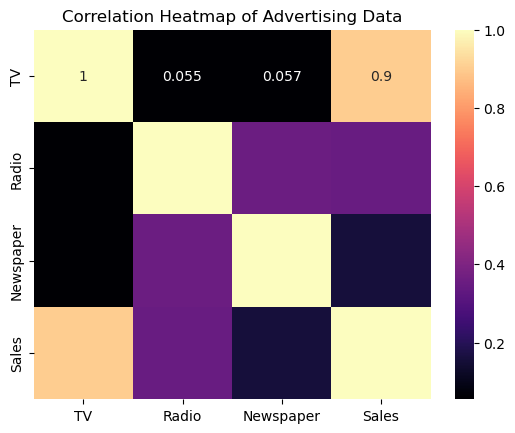

In [35]:
# Computing the correlation matrix
corr = dt.corr()

# Plotting the heatmap
sns.heatmap(corr, annot=True , cmap='magma' )
plt.title('Correlation Heatmap of Advertising Data')
plt.show()

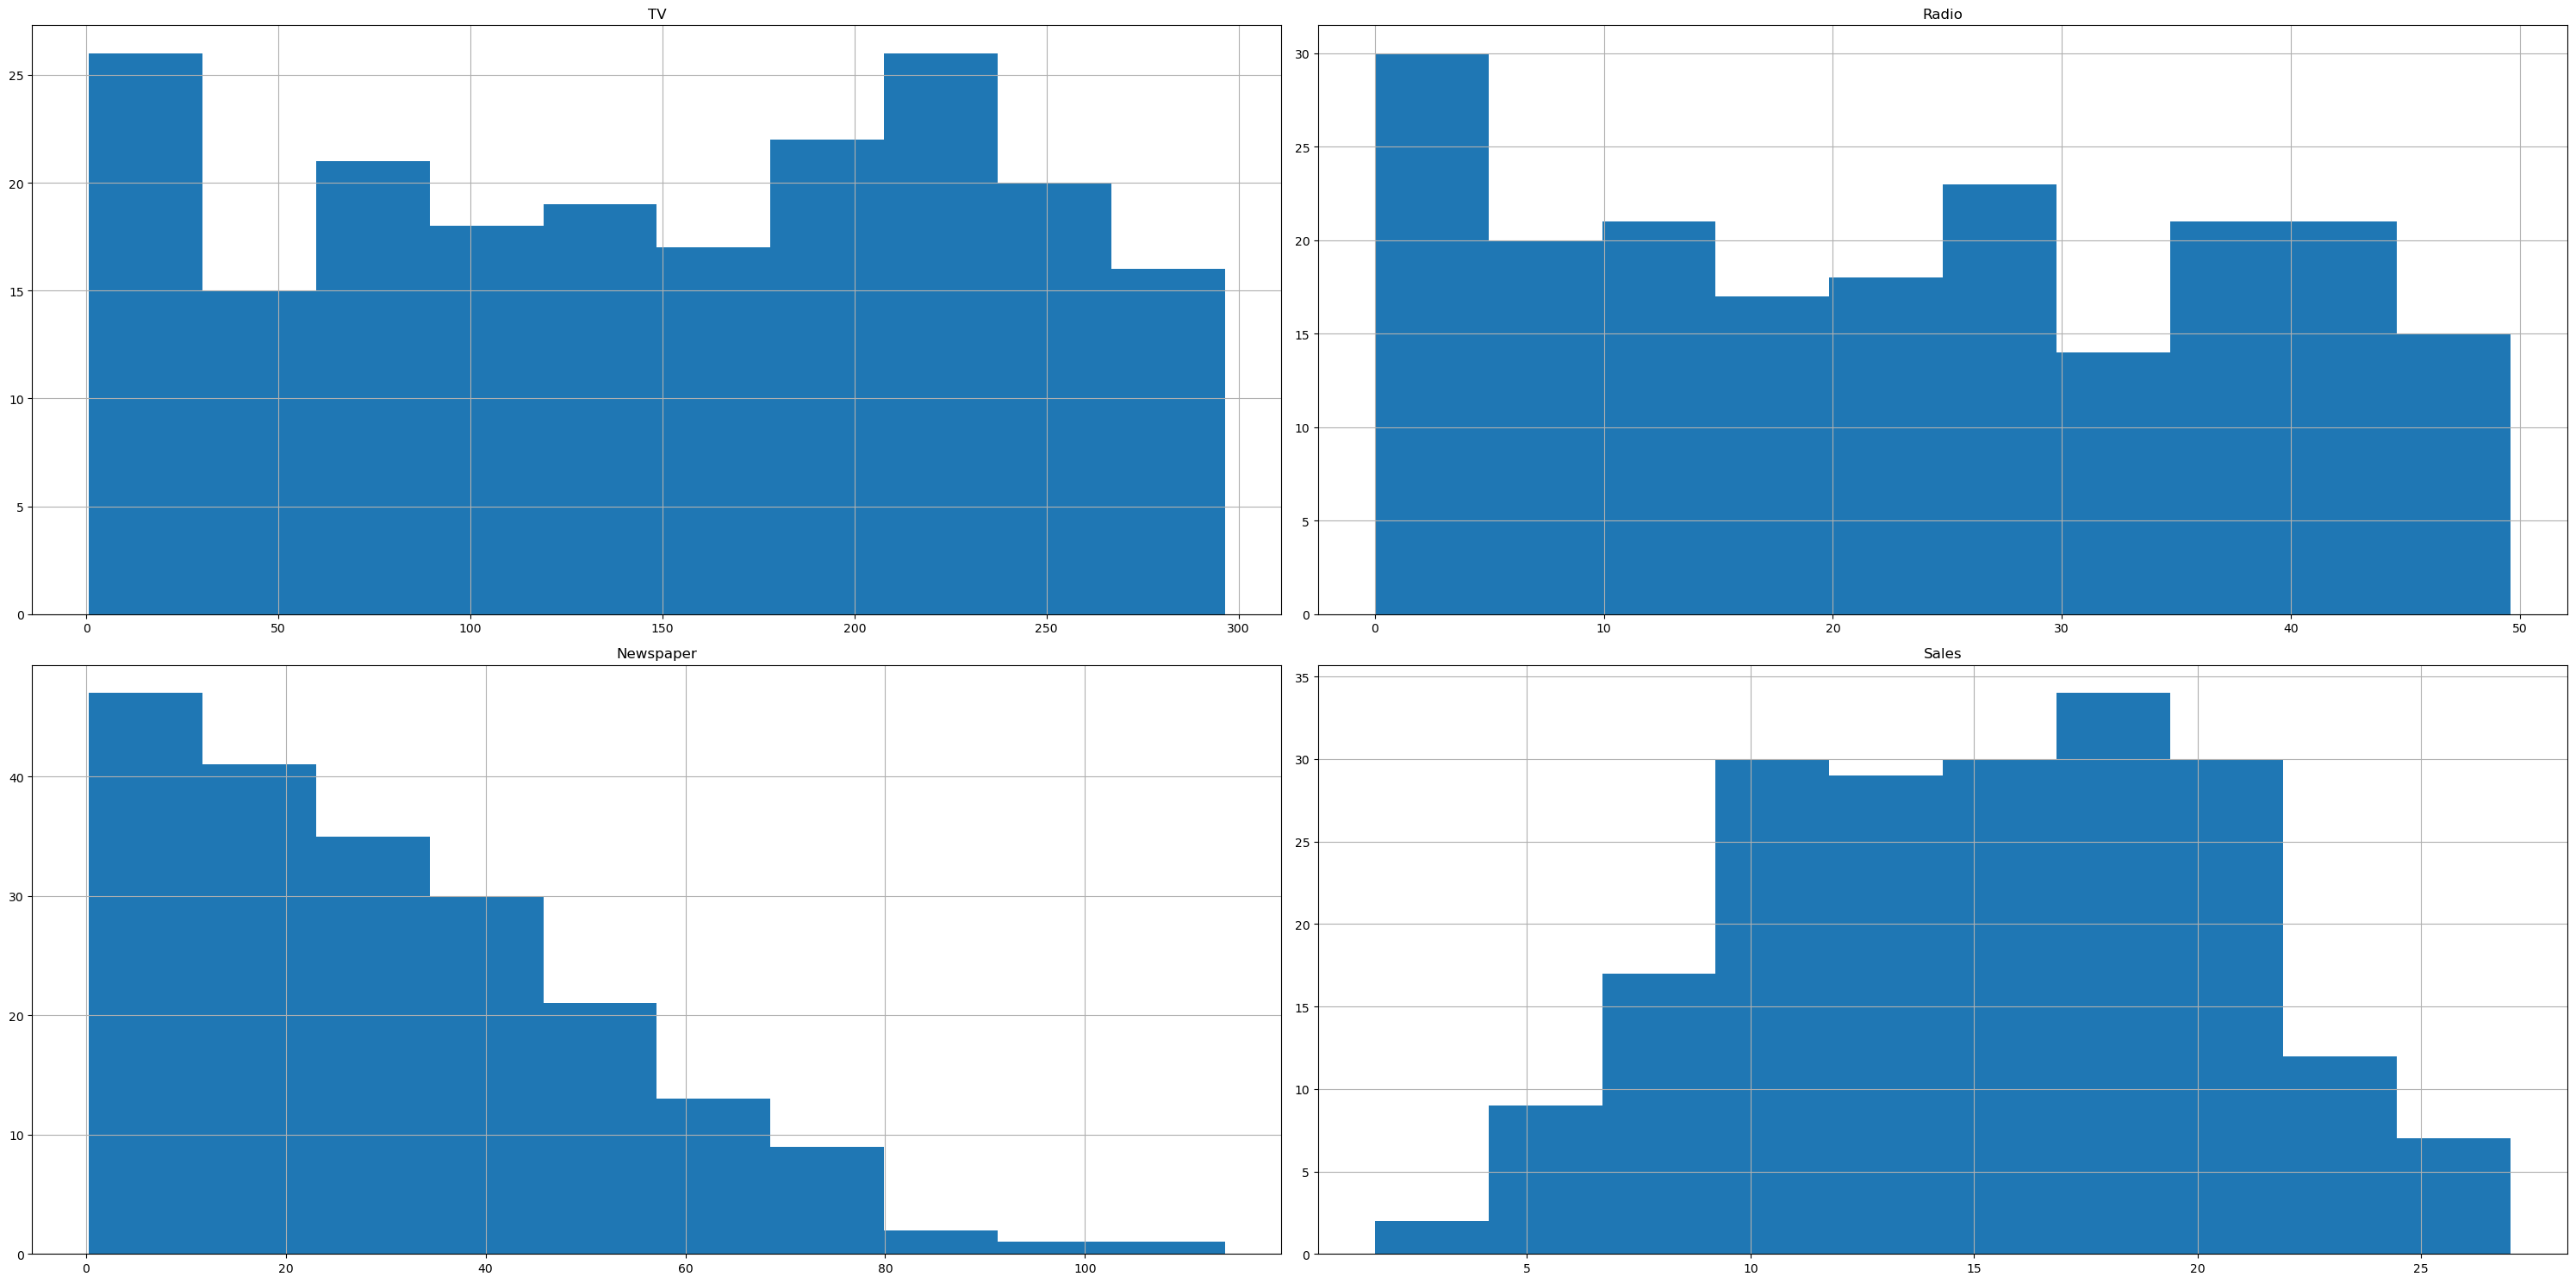

In [37]:
#Visualization using histogram of each attribute 
dt.hist(figsize=(30, 15))
plt.tight_layout() 
plt.show()

Now let's split the data into training and testing sets to make predictions.

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
x = dt[['TV', 'Radio', 'Newspaper']]  # Features: TV, radio, and newspaper advertising budgets
y = dt['Sales']  # Target variable: Sales

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

In [54]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [55]:
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [56]:
y_pred = model.predict(x_test)

In [58]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [59]:
mse

3.0102409750000003

In [60]:
r2

0.8897536356957207

In [61]:
metrics = ['Mean Squared Error (MSE)', 'R^2 Score']
values = [mse, r2]

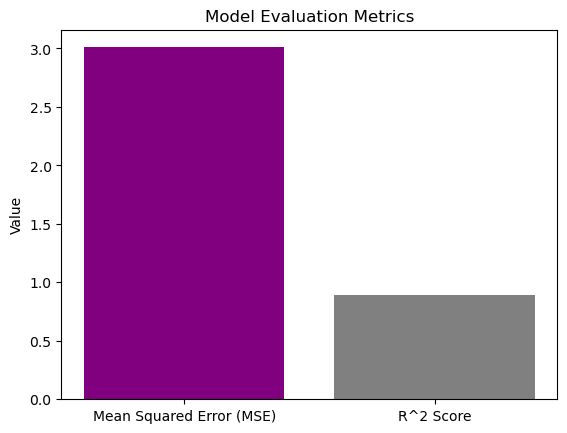

In [63]:
plt.bar(metrics, values, color=['purple', 'grey'])
plt.ylabel('Value')
plt.title('Model Evaluation Metrics')
plt.show()

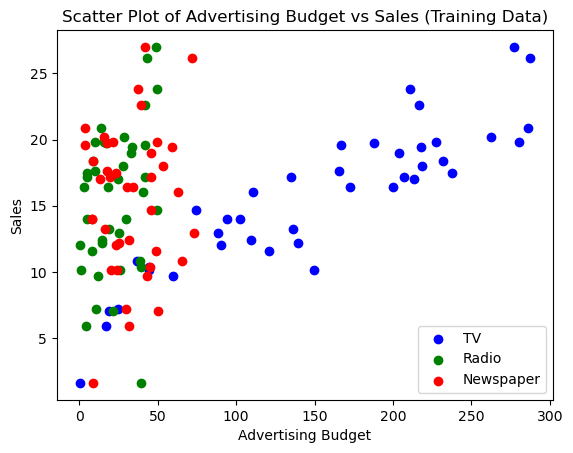

In [64]:
plt.scatter(x_train['TV'], y_train, color='blue', label='TV')
plt.scatter(x_train['Radio'], y_train, color='green', label='Radio')
plt.scatter(x_train['Newspaper'], y_train, color='red', label='Newspaper')
plt.xlabel('Advertising Budget')
plt.ylabel('Sales')
plt.title('Scatter Plot of Advertising Budget vs Sales (Training Data)')
plt.legend()
plt.show()

In [65]:
feature_importances = model.feature_importances_

In [66]:
for i, feature_name in enumerate(X_train.columns):
    print(f"{feature_name}: {feature_importances[i]}")

TV: 0.813211008279729
Radio: 0.16290529059044948
Newspaper: 0.02388370112982144
